<a href="https://colab.research.google.com/github/hasmitha005/OIBSIP/blob/main/Project_3_Proposal_level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
from google.colab import files
import pandas as pd
import io

# Step 2: Upload the CSV file
uploaded = files.upload()

# Step 3: Detect the uploaded file automatically (so no name issues)
filename = list(uploaded.keys())[0]
print(f"✅ Uploaded file detected: {filename}")

# Step 4: Read the CSV file
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Step 5: Display the first few rows
print("✅ File loaded successfully!")
print("Shape of dataset:", df.shape)
df.head()


Saving creditcard.csv to creditcard.csv
✅ Uploaded file detected: creditcard.csv
✅ File loaded successfully!
Shape of dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Quick checks
print(df.info())
print("\nClass counts:")
print(df['Class'].value_counts())   # 0 = non-fraud, 1 = fraud
print("\nProportion fraud:", df['Class'].mean())
print("\nAmount & Time describe:")
print(df[['Amount','Time']].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale Time and Amount (other features V1..V28 are already PCA components)
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])

# Build model DataFrame (drop original Time & Amount if you want)
df_model = df.drop(['Time','Amount'], axis=1)

X = df_model.drop('Class', axis=1)
y = df_model['Class']

print("X shape:", X.shape, "y shape:", y.shape)


X shape: (284807, 30) y shape: (284807,)


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Stratified split to keep class ratios in train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train class counts before SMOTE:\n", y_train.value_counts())

# Apply SMOTE to the training portion only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("After SMOTE, train class counts:\n", y_train_res.value_counts())


Train: (227845, 30) Test: (56962, 30)
Train class counts before SMOTE:
 Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE, train class counts:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

# Logistic Regression (fast)
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train_res, y_train_res)

# Random Forest (smaller and faster)
rf = RandomForestClassifier(n_estimators=50, max_depth=10, class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

# Predictions & probabilities
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:,1]

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

# Reports
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))
print("Average precision (PR AUC):", average_precision_score(y_test, y_proba_lr))

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print("Average precision (PR AUC):", average_precision_score(y_test, y_proba_rf))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962

Confusion matrix:
 [[55406  1458]
 [    8    90]]
ROC AUC: 0.9698482164390798
Average precision (PR AUC): 0.7248611768135257

=== Random Forest ===
              precision    recall  f1-score   support

           0     0.9998    0.9980    0.9989     56864
           1     0.4221    0.8571    0.5657        98

    accuracy                         0.9977     56962
   macro avg     0.7109    0.9276    0.7823     56962
weighted avg     0.9988    0.9977    0.9981     56962

Confusion matrix:
 [[56749   115]
 [   14    84]]
ROC AUC: 0.9801930743456639
Average precision (PR AUC): 0.8065945290508899


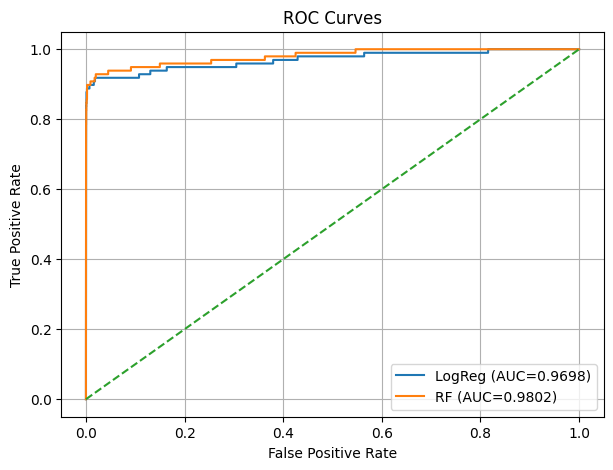

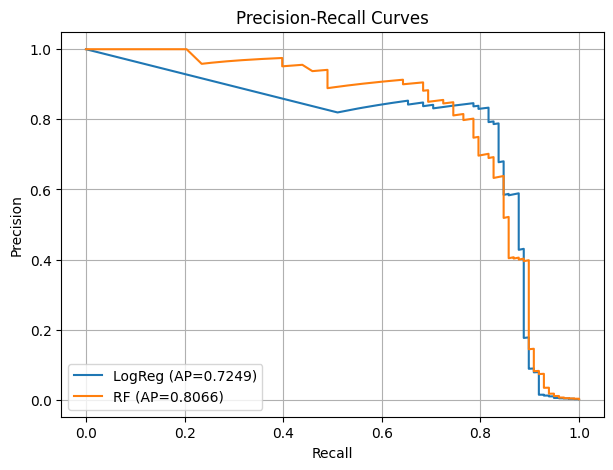

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score

# ROC
plt.figure(figsize=(7,5))
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
plt.plot(fpr, tpr, label=f"LogReg (AUC={roc_auc_score(y_test, y_proba_lr):.4f})")
fpr2, tpr2, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr2, tpr2, label=f"RF (AUC={roc_auc_score(y_test, y_proba_rf):.4f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall
plt.figure(figsize=(7,5))
prec, rec, _ = precision_recall_curve(y_test, y_proba_lr)
plt.plot(rec, prec, label=f"LogReg (AP={average_precision_score(y_test,y_proba_lr):.4f})")
prec2, rec2, _ = precision_recall_curve(y_test, y_proba_rf)
plt.plot(rec2, prec2, label=f"RF (AP={average_precision_score(y_test,y_proba_rf):.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

def evaluate_threshold(y_true, scores, threshold):
    preds = (scores >= threshold).astype(int)
    return precision_score(y_true, preds), recall_score(y_true, preds)

# Example: try a few thresholds
for thr in [0.9, 0.7, 0.5, 0.3, 0.1]:
    p, r = evaluate_threshold(y_test, y_proba_rf, thr)
    print(f"Threshold {thr:.2f} -> Precision: {p:.4f}, Recall: {r:.4f}")


Threshold 0.90 -> Precision: 0.8452, Recall: 0.7245
Threshold 0.70 -> Precision: 0.6864, Recall: 0.8265
Threshold 0.50 -> Precision: 0.4221, Recall: 0.8571
Threshold 0.30 -> Precision: 0.1445, Recall: 0.8980
Threshold 0.10 -> Precision: 0.0177, Recall: 0.9388
